<a href="https://colab.research.google.com/github/fsoto21/Portafolio/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize
from IPython.display import Image, display

In [232]:
# leyendo el archivo TelecomX_Data.json
df = pd.read_json('TelecomX_Data.json')
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB



**<font color=#56B4E9>Expandiendo las columnas anidadas</font>**




In [234]:
# Expandir las columnas anidadas
df_customer = pd.json_normalize(df['customer']).add_prefix('customer_')
df_phone    = pd.json_normalize(df['phone']).add_prefix('phone_')
df_internet = pd.json_normalize(df['internet']).add_prefix('internet_')
df_account  = pd.json_normalize(df['account']).add_prefix('account_')


In [235]:
# Combinar todo en un solo DataFrame
df_normalizado = pd.concat([
    df[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)


In [236]:
# Convertir columna 'account_Charges.Total' a numérico
df_normalizado['account_Charges.Total'] = pd.to_numeric(df_normalizado['account_Charges.Total'], errors='coerce')

# Reemplazar valores vacíos en 'Churn' por NaN
df_normalizado['Churn'] = df_normalizado['Churn'].replace('', np.nan)

# 6. Eliminar filas con valores nulos en columnas clave
df_limpio = df_normalizado.dropna(subset=['Churn', 'account_Charges.Total'])


In [237]:
# Columnas del nuevo dataframe
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [238]:
# RenombraR las columnas para quitar los prefijos agregados
df_normalizado.columns = df_normalizado.columns.str.replace('customer_', '')
df_normalizado.columns = df_normalizado.columns.str.replace('phone_', '')
df_normalizado.columns = df_normalizado.columns.str.replace('internet_', '')
df_normalizado.columns = df_normalizado.columns.str.replace('account_', '')
df_normalizado.columns


Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

#🔧 Transformación

In [239]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [240]:
# Paso 1: Eliminar espacios en blanco
df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].astype(str).str.replace(' ', '', regex=False)

# Paso 2: Convertir a número (float)
df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'], errors='coerce')

# Paso 3: Llenar nulos con 0 (opcional, solo si es válido para tu análisis)
df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].fillna(0)

# Paso 4: Confirmar estructura
df_normalizado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [241]:
df_normalizado.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
5547,7596-LDUXP,No,Female,0,No,No,12,Yes,No,Fiber optic,...,No,No,No,Yes,No,One year,Yes,Credit card (automatic),85.15,979.05
1569,2235-ZGKPT,Yes,Female,0,Yes,Yes,4,Yes,Yes,DSL,...,No,No,No,No,No,Month-to-month,No,Mailed check,50.85,239.55
6836,9430-FRQOC,Yes,Female,0,No,Yes,4,Yes,Yes,Fiber optic,...,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,87.10,341.45
5598,7643-RCHXS,No,Female,0,Yes,Yes,63,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check,19.35,1263.85
3727,5136-GFPMB,No,Male,0,No,No,54,Yes,Yes,Fiber optic,...,No,Yes,No,No,Yes,Month-to-month,No,Credit card (automatic),89.40,4869.50


**<font color=#56B4E9>Análisis de consistencia de información</font>**

In [242]:
# --- ANÁLISIS DE CONSISTENCIA ---

# PhoneService vs MultipleLines
print("\n📌 Consistencia: PhoneService vs MultipleLines")
print(df_normalizado.groupby(['PhoneService', 'MultipleLines']).size())


📌 Consistencia: PhoneService vs MultipleLines
PhoneService  MultipleLines   
No            No phone service     707
Yes           No                  3495
              Yes                 3065
dtype: int64


In [243]:
# InternetService vs OnlineSecurity
print("\n📌 Consistencia: InternetService vs OnlineSecurity")
print(df_normalizado.groupby(['InternetService', 'OnlineSecurity']).size())



📌 Consistencia: InternetService vs OnlineSecurity
InternetService  OnlineSecurity     
DSL              No                     1279
                 Yes                    1209
Fiber optic      No                     2329
                 Yes                     869
No               No internet service    1581
dtype: int64


In [244]:
# InternetService vs OnlineBackup
print("\n📌 Consistencia: InternetService vs OnlineBackup")
print(df_normalizado.groupby(['InternetService', 'OnlineBackup']).size())



📌 Consistencia: InternetService vs OnlineBackup
InternetService  OnlineBackup       
DSL              No                     1371
                 Yes                    1117
Fiber optic      No                     1811
                 Yes                    1387
No               No internet service    1581
dtype: int64


In [245]:
# InternetService vs DeviceProtection
print("\n📌 Consistencia: InternetService vs DeviceProtection")
print(df_normalizado.groupby(['InternetService', 'DeviceProtection']).size())


📌 Consistencia: InternetService vs DeviceProtection
InternetService  DeviceProtection   
DSL              No                     1398
                 Yes                    1090
Fiber optic      No                     1797
                 Yes                    1401
No               No internet service    1581
dtype: int64


In [246]:
# InternetService vs TechSupport
print("\n📌 Consistencia: InternetService vs TechSupport")
print(df_normalizado.groupby(['InternetService', 'TechSupport']).size())


📌 Consistencia: InternetService vs TechSupport
InternetService  TechSupport        
DSL              No                     1280
                 Yes                    1208
Fiber optic      No                     2302
                 Yes                     896
No               No internet service    1581
dtype: int64


In [247]:
# InternetService vs StreamingTV
print("\n📌 Consistencia: InternetService vs StreamingTV")
print(df_normalizado.groupby(['InternetService', 'StreamingTV']).size())



📌 Consistencia: InternetService vs StreamingTV
InternetService  StreamingTV        
DSL              No                     1504
                 Yes                     984
Fiber optic      No                     1392
                 Yes                    1806
No               No internet service    1581
dtype: int64


In [248]:
# InternetService vs StreamingMovies
print("\n📌 Consistencia: InternetService vs StreamingMovies")
print(df_normalizado.groupby(['InternetService', 'StreamingMovies']).size())


📌 Consistencia: InternetService vs StreamingMovies
InternetService  StreamingMovies    
DSL              No                     1484
                 Yes                    1004
Fiber optic      No                     1386
                 Yes                    1812
No               No internet service    1581
dtype: int64


In [249]:
# Revisar duplicados en customerID
print("\n🔍 Duplicados por customerID:")
print(df_normalizado[df_normalizado.duplicated(subset='customerID', keep=False)])


🔍 Duplicados por customerID:
Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Charges.Monthly, Charges.Total]
Index: []

[0 rows x 21 columns]


In [250]:
# Revisar valores únicos por columna (excepto customerID)
print("\n🔍 Valores únicos por columna categórica:")
for col in df_normalizado.columns:
    if df_normalizado[col].dtype == 'object' and col != 'customerID':
        print(f"\nValores únicos en '{col}': {df_normalizado[col].unique()}")


🔍 Valores únicos por columna categórica:

Valores únicos en 'Churn': ['No' 'Yes' nan]

Valores únicos en 'gender': ['Female' 'Male']

Valores únicos en 'Partner': ['Yes' 'No']

Valores únicos en 'Dependents': ['Yes' 'No']

Valores únicos en 'PhoneService': ['Yes' 'No']

Valores únicos en 'MultipleLines': ['No' 'Yes' 'No phone service']

Valores únicos en 'InternetService': ['DSL' 'Fiber optic' 'No']

Valores únicos en 'OnlineSecurity': ['No' 'Yes' 'No internet service']

Valores únicos en 'OnlineBackup': ['Yes' 'No' 'No internet service']

Valores únicos en 'DeviceProtection': ['No' 'Yes' 'No internet service']

Valores únicos en 'TechSupport': ['Yes' 'No' 'No internet service']

Valores únicos en 'StreamingTV': ['Yes' 'No' 'No internet service']

Valores únicos en 'StreamingMovies': ['No' 'Yes' 'No internet service']

Valores únicos en 'Contract': ['One year' 'Month-to-month' 'Two year']

Valores únicos en 'PaperlessBilling': ['Yes' 'No']

Valores únicos en 'PaymentMethod': ['Mailed 

In [251]:
# Verificación final
print("\n✅ Verificación final del DataFrame limpio:")
df_normalizado.info()


✅ Verificación final del DataFrame limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16

In [252]:
# Guardar archivo final limpio
df_normalizado.to_csv("TelecomX_Data_normalizado.csv", index=False)

In [253]:
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [254]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#📊 Carga y análisis

In [255]:
# Cargar datos
df = pd.read_csv("TelecomX_Data_normalizado.csv")

# Estadísticas descriptivas para todas las columnas
desc_stats = df.describe().transpose()

# Filtrar variables binarias (media = proporción)
binary_vars = desc_stats[desc_stats['max'] == 1][['mean', 'std']]
print("Variables Binarias (Proporciones):\n", binary_vars.sort_values('mean', ascending=False))

# Variables numéricas clave
numeric_vars = ['tenure', 'Charges.Monthly', 'Charges.Total']
print("\nEstadísticas de Variables Numéricas:\n", desc_stats.loc[numeric_vars])

Variables Binarias (Proporciones):
                    mean       std
SeniorCitizen  0.162653  0.369074

Estadísticas de Variables Numéricas:
                   count         mean          std    min      25%     50%  \
tenure           7267.0    32.346498    24.571773   0.00    9.000    29.0   
Charges.Monthly  7267.0    64.720098    30.129572  18.25   35.425    70.3   
Charges.Total    7267.0  2277.182035  2268.648587   0.00  396.200  1389.2   

                      75%      max  
tenure             55.000    72.00  
Charges.Monthly    89.875   118.75  
Charges.Total    3778.525  8684.80  


**<font color=#56B4E9>Distribución de Clientes Vigentes y No Vigentes</font>**

---
---

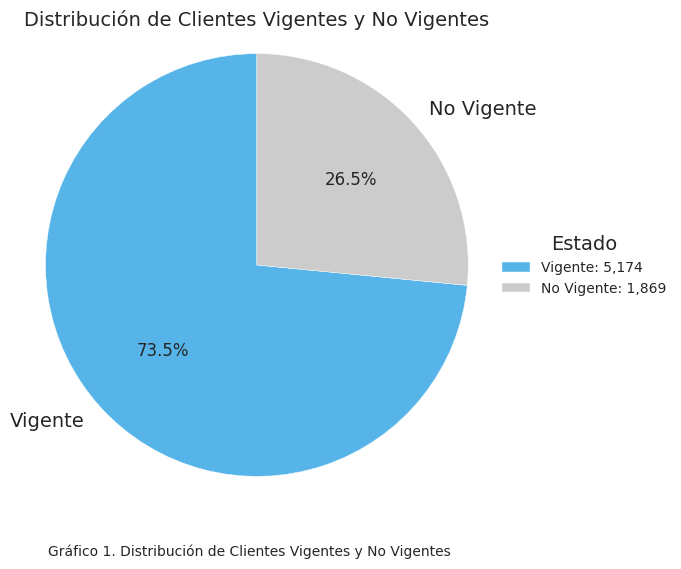

In [256]:
import matplotlib.pyplot as plt

# 1. Contar los valores
serie = df_normalizado['Churn'].value_counts()
labels = ['Vigente', 'No Vigente']  # En el orden de value_counts(): No, Yes

# 2. Colores
colors = ['#56B4E9', '#CCCCCC']  # Azul claro y gris medio

# 3. Crear gráfico circular
fig, ax = plt.subplots(figsize=(6, 6))

wedges, texts, autotexts = ax.pie(
    serie,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)

# 4. Ajuste de tamaños de letra
for text in autotexts:
    text.set_fontsize(12)
for text in texts:
    text.set_fontsize(14)

# 5. Leyenda con valores absolutos
valores_abs = [f'{etiqueta}: {valor:,}' for etiqueta, valor in zip(labels, serie)]
ax.legend(wedges, valores_abs, title='Estado', loc='center left', bbox_to_anchor=(1, 0.5))

# 6. Título y formato
plt.title('Distribución de Clientes Vigentes y No Vigentes', fontsize=14)
ax.axis('equal')  # mantener forma circular

# 7. Pie de gráfico
plt.figtext(0.5, 0.01, 'Gráfico 1. Distribución de Clientes Vigentes y No Vigentes',
            ha='center', fontsize=10)

# 8. Mostrar gráfico
plt.show()


/tmp/ipython-input-257-1281248129.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barra = sns.barplot(


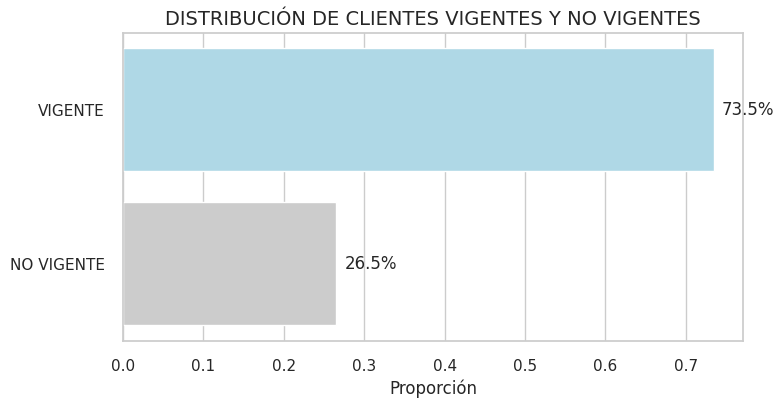

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preparar los datos agrupados
df_estado = df_normalizado['Churn'].map({'No': 'VIGENTE', 'Yes': 'NO VIGENTE'}).value_counts(normalize=True).reset_index()
df_estado.columns = ['Estado', 'Proporcion']

# 2. Colores suaves: azul pastel y gris claro
colors = ['#A6DCEF', '#CCCCCC']

# 3. Estilo Seaborn y gráfico de barras horizontales
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 4))
barra = sns.barplot(
    data=df_estado,
    x='Proporcion',
    y='Estado',
    palette=colors,
    ax=ax
)

# 4. Mostrar valores porcentuales en las barras
for i, p in enumerate(barra.patches):
    ancho = p.get_width()
    ax.text(ancho + 0.01, p.get_y() + p.get_height()/2,
            f'{ancho:.1%}', va='center', fontsize=12)

# 5. Personalización
ax.set_title('DISTRIBUCIÓN DE CLIENTES VIGENTES Y NO VIGENTES', fontsize=14)
ax.set_xlabel('Proporción')
ax.set_ylabel('')

# 6. Mostrar gráfico
plt.show()


**<font color=#56B4E9>Distribución de Clientes Vigentes y No Vigentes por Categorías</font>**

---
---

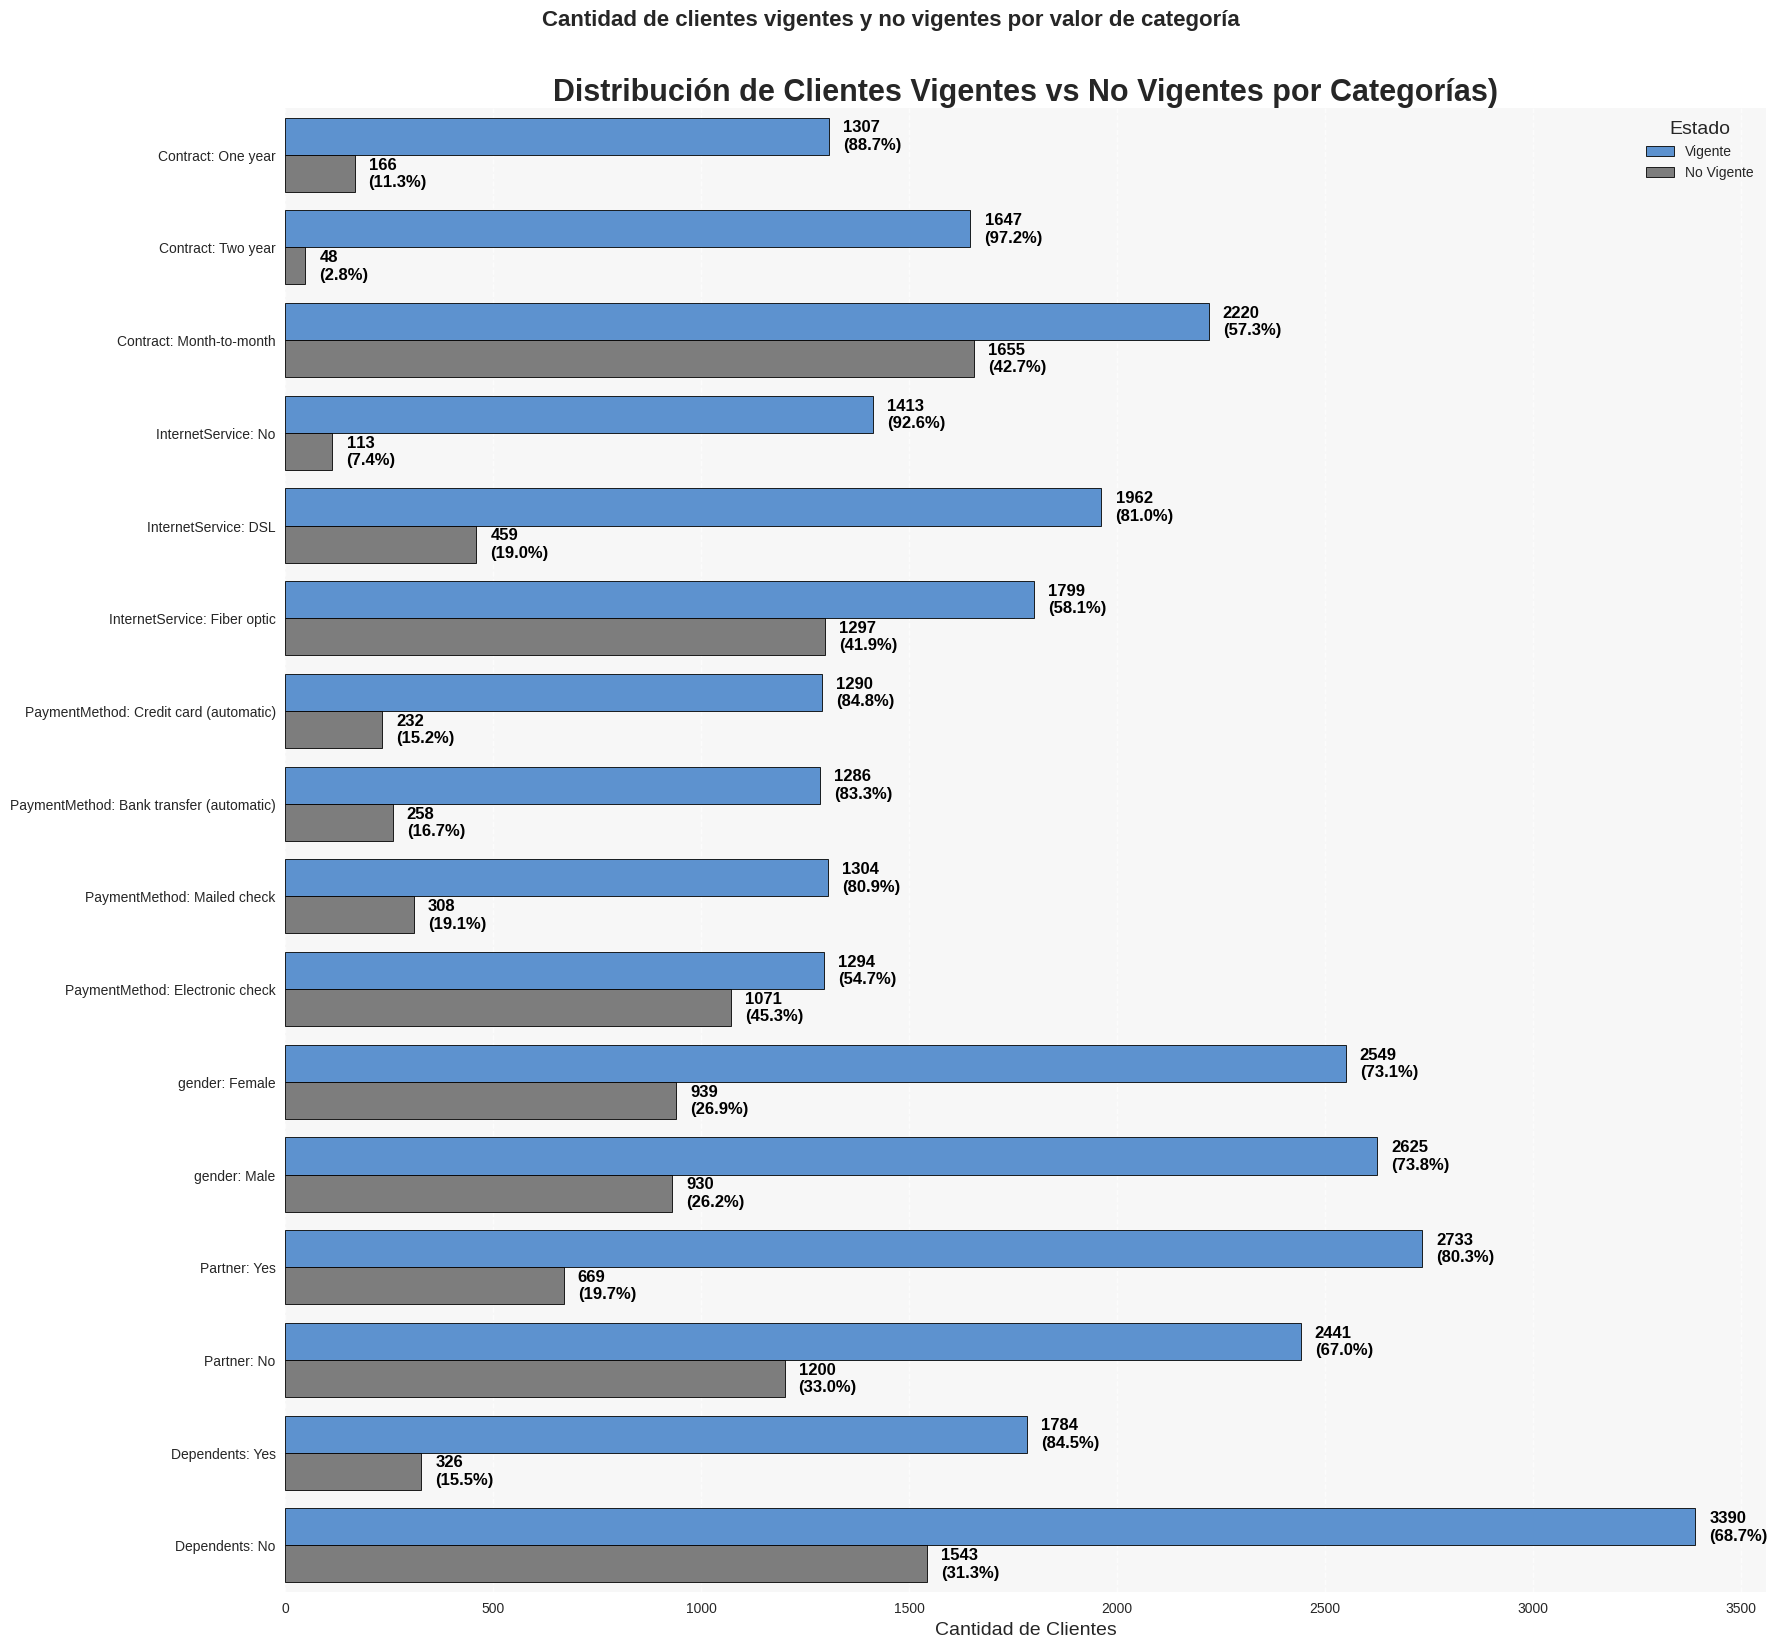

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general
plt.style.use('seaborn-v0_8')
plt.rcParams.update({
    'figure.figsize': (18, 16),
    'font.size': 13,
    'axes.titlesize': 20,
    'axes.labelsize': 16,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
    'legend.fontsize': 13,
    'legend.title_fontsize': 14
})

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (18, 16)

palette = {"Vigente": "#4A90E2", "No Vigente": "#7D7D7D"}

try:
    df = pd.read_csv("TelecomX_Data_normalizado.csv")
except FileNotFoundError:
    raise FileNotFoundError("No se encontró el archivo. Verifica la ruta: 'TelecomX_Data_normalizado.csv'")

df['Estado'] = df['Churn'].map({'No': 'Vigente', 'Yes': 'No Vigente'})

categorias = ['Contract', 'InternetService', 'PaymentMethod', 'gender', 'Partner', 'Dependents']

lista_datos = []

for col in categorias:
    data = df.groupby([col, 'Estado']).size().unstack(fill_value=0).reset_index()
    data_long = data.melt(id_vars=[col], value_vars=['Vigente', 'No Vigente'],
                          var_name='Estado', value_name='Cantidad')
    data_long['Categoría'] = col
    data_long.rename(columns={col: 'Nivel'}, inplace=True)

    totales = data_long.groupby('Nivel')['Cantidad'].transform('sum')
    data_long['Porcentaje'] = (data_long['Cantidad'] / totales) * 100

    lista_datos.append(data_long)

df_todos = pd.concat(lista_datos, ignore_index=True)

df_todos['Categoría_Nivel'] = df_todos['Categoría'] + ': ' + df_todos['Nivel'].astype(str)

orden_categorias = categorias

orden_niveles = {}
for cat in orden_categorias:
    temp = df_todos[df_todos['Categoría'] == cat].groupby('Nivel')['Cantidad'].sum()
    niveles_ordenados = temp.sort_values(ascending=True).index.tolist()
    orden_niveles[cat] = niveles_ordenados

orden_final = []
for cat in orden_categorias:
    niveles = orden_niveles[cat]
    orden_final.extend([f"{cat}: {nivel}" for nivel in niveles])

df_todos['Categoría_Nivel'] = pd.Categorical(df_todos['Categoría_Nivel'], categories=orden_final, ordered=True)
df_todos = df_todos.sort_values('Categoría_Nivel')

plt.figure(figsize=(18, 16))
ax = sns.barplot(data=df_todos, y='Categoría_Nivel', x='Cantidad', hue='Estado', palette=palette, edgecolor='black', linewidth=0.6)

# Para relacionar cada barra con datos, iteramos con cuidado
for bar in ax.patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    x = width

     # Obtener el índice aproximado de barra en eje y (es entero cercano)
    idx_y = int(round(y))

    # Obtener niveles únicos para el eje y
    niveles_unicos = df_todos['Categoría_Nivel'].cat.categories.tolist()

    if idx_y < 0 or idx_y >= len(niveles_unicos):
        continue  # fuera de rango, saltar

    nivel_str = niveles_unicos[idx_y]

    # Extraer color RGB de la barra para identificar estado
    bar_color = bar.get_facecolor()

    # Mapear colores de la paleta a estados aproximados
    def color_to_estado(rgb):
        # RGB es tupla (r,g,b,a)
        # Comparamos con la paleta convertida a RGB
        azul = plt.colors.to_rgba(palette["Vigente"])
        gris = plt.colors.to_rgba(palette["No Vigente"])
        # Comparar distancia euclidiana (simplificado)
        dist_azul = sum((a-b)**2 for a,b in zip(rgb[:3], azul[:3]))**0.5
        dist_gris = sum((a-b)**2 for a,b in zip(rgb[:3], gris[:3]))**0.5
        return "Vigente" if dist_azul < dist_gris else "No Vigente"

    # Buscar filas para ese nivel_str
    df_filtrado = df_todos[df_todos['Categoría_Nivel'] == nivel_str]

    # Por defecto buscamos estado con la barra que tiene ancho width (cantidad)
    # Permitimos margen pequeño por redondeo
    fila = df_filtrado[(df_filtrado['Cantidad'] >= width - 0.5) & (df_filtrado['Cantidad'] <= width + 0.5)]

    if fila.empty:
        # Si no encontró, solo tomamos la fila con cantidad más cercana
        fila = df_filtrado.iloc[(df_filtrado['Cantidad'] - width).abs().argsort()[:1]]
    else:
        fila = fila.iloc[0:1]

    if isinstance(fila, pd.DataFrame):
        fila = fila.iloc[0]

    porcentaje = fila['Porcentaje']

    if width > 10:
        ax.text(x + max(df_todos['Cantidad']) * 0.01, y,
                f"{int(width)}\n({porcentaje:.1f}%)",
                ha='left', va='center', fontsize=12, fontweight='bold', color='black')


plt.title('Distribución de Clientes Vigentes vs No Vigentes por Categorías)', fontsize=22, fontweight='bold')
plt.xlabel('Cantidad de Clientes', fontsize=14)
plt.ylabel('')
plt.legend(title='Estado', loc='upper right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine(top=True, right=True)

# Fondo claro
ax.set_facecolor('#f7f7f7')

plt.tight_layout()
plt.suptitle("Cantidad de clientes vigentes y no vigentes por valor de categoría",
             fontsize=16, fontweight='bold', y=1.03)
plt.show()

**<font color=#56B4E9>Análisis de Abandono según el tiempo de permanencia</font>**

---
---



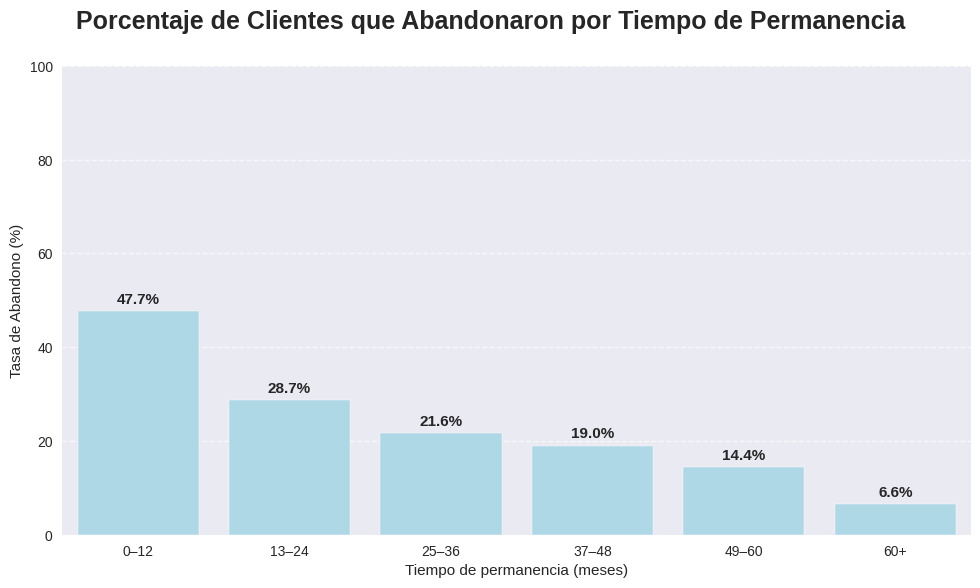

In [259]:
# Leer datos
df = pd.read_csv('TelecomX_Data_normalizado.csv')

# Convertir 'Churn' a binario
df['Churn_bin'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Crear rangos de tiempo de permanencia (en meses)
bins = [0, 12, 24, 36, 48, 60, df['tenure'].max()]
labels = ['0–12', '13–24', '25–36', '37–48', '49–60', '60+']
df['Grupo_tenure'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

# Calcular proporción de abandono por grupo
churn_por_grupo = df.groupby('Grupo_tenure', observed=False)['Churn_bin'].mean().reset_index()
churn_por_grupo['Churn_%'] = churn_por_grupo['Churn_bin'] * 100

# Visualización #E74C3C
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_por_grupo, x='Grupo_tenure', y='Churn_%', color='#A6DCEF')

# Estilo
plt.subplots_adjust(top=0.9)  # <-- Añade espacio arriba para el título
plt.suptitle('Porcentaje de Clientes que Abandonaron por Tiempo de Permanencia',
             fontsize=18, fontweight='bold')  # Título visible y centrado
plt.xlabel('Tiempo de permanencia (meses)')
plt.ylabel('Tasa de Abandono (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

# Añadir etiquetas de porcentaje
for index, row in churn_por_grupo.iterrows():
    plt.text(index, row['Churn_%'] + 1, f"{row['Churn_%']:.1f}%",
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


**<font color=#56B4E9>Cantidad de Clientes que Abandonaron por Tiempo de Permanencia</font>**

---
---


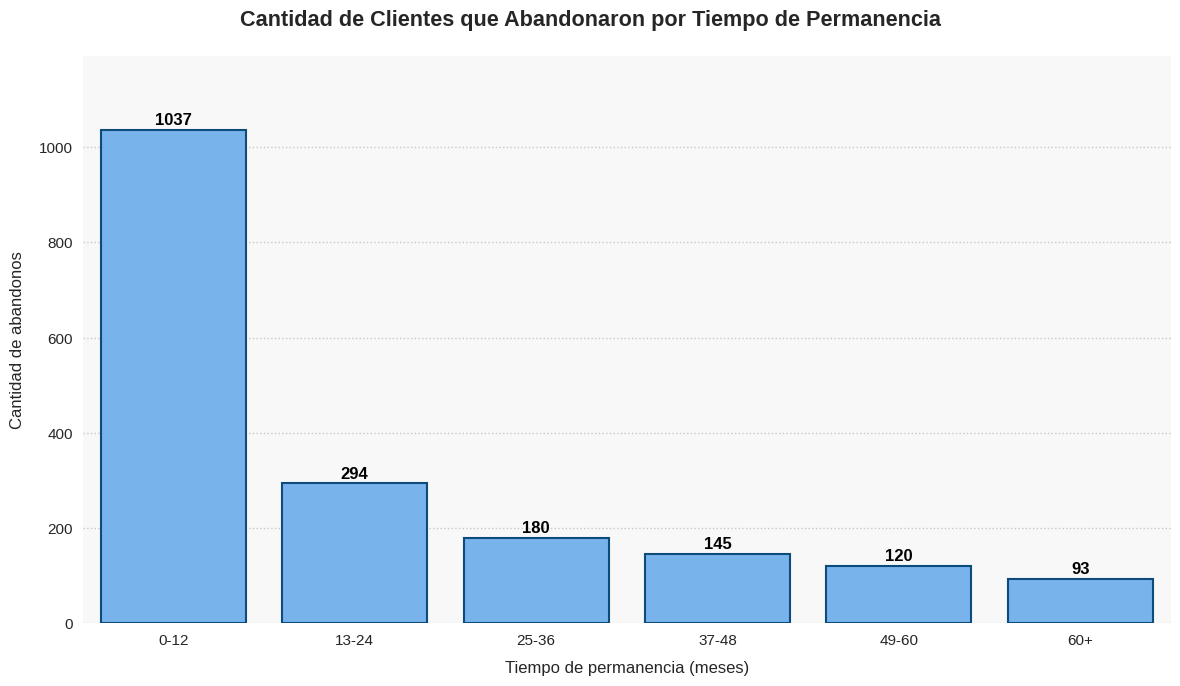

In [260]:
# Configuración de estilo mejorada
plt.rcParams.update({
    'figure.figsize': (12, 7),
    'axes.titlesize': 16,
    'axes.labelsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11
})

# Leer y preparar datos
df = pd.read_csv('TelecomX_Data_normalizado.csv')
bins = [0, 12, 24, 36, 48, 60, df['tenure'].max()]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '60+']
df['Grupo_tenure'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

# Procesamiento eficiente
df_abandonaron = df[df['Churn'] == 'Yes']
cantidad_abandono = df_abandonaron['Grupo_tenure'].value_counts().sort_index().reset_index()
cantidad_abandono.columns = ['Grupo_tenure', 'Cantidad']

# Creación del gráfico
fig, ax = plt.subplots()
sns.barplot(data=cantidad_abandono,
            x='Grupo_tenure',
            y='Cantidad',
            color='#66B3FF',
            edgecolor='#0d4b7a',
            linewidth=1.5,
            ax=ax)

# Títulos y etiquetas (optimizados)
fig.suptitle('Cantidad de Clientes que Abandonaron por Tiempo de Permanencia',
             y=0.98, fontweight='bold')
ax.set_xlabel('Tiempo de permanencia (meses)', labelpad=10)
ax.set_ylabel('Cantidad de abandonos', labelpad=10)

# Gridlines mejorados
ax.grid(axis='y', linestyle=':', color='gray', alpha=0.4)

# Etiquetas en negro con formato profesional
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.,
            height + 5,  # Espacio adicional arriba de la barra
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=12,
            fontweight='bold',
            color='black')

# Ajustes finales
ax.set_facecolor('#f8f8f8')
fig.set_facecolor('white')
sns.despine(left=True, bottom=True)
ax.set_ylim(0, cantidad_abandono['Cantidad'].max() * 1.15)  # Margen superior

plt.tight_layout()
plt.show()

**<font color=#56B4E9>Porcentaje de clientes que Abandono por Tiempo de Permanencia y Género</font>**

---
---

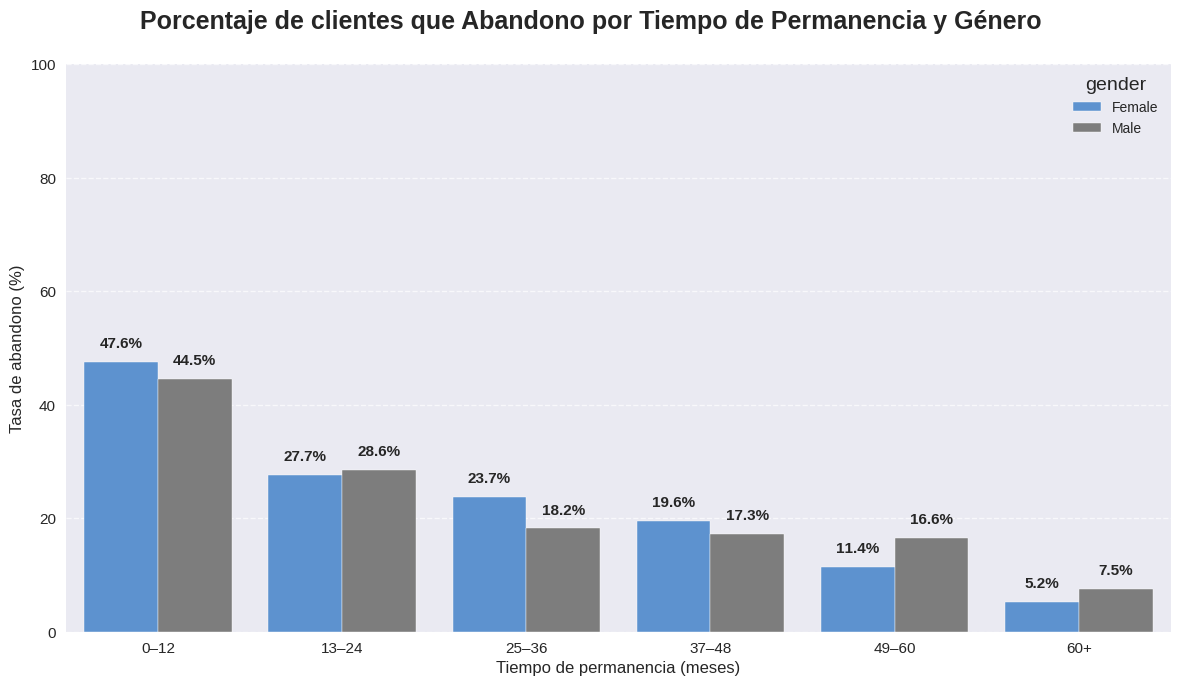

In [261]:
# Leer datos
df = pd.read_csv('TelecomX_Data_normalizado.csv')

# Crear rangos de tiempo de permanencia (en meses)
bins = [0, 12, 24, 36, 48, 60, df['tenure'].max()]
labels = ['0–12', '13–24', '25–36', '37–48', '49–60', '60+']
df['Grupo_tenure'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

# Total clientes por grupo y género
total_por_grupo_genero = df.groupby(['Grupo_tenure', 'gender'], observed=False).size().reset_index(name='Total')

# Abandonos por grupo y género
total_por_grupo_genero = df.groupby(['Grupo_tenure', 'gender'], observed=False).size().reset_index(name='Total')

# Abandonos por grupo y género
abandono_por_grupo_genero = df[df['Churn'] == 'Yes'].groupby(['Grupo_tenure', 'gender'], observed=False).size().reset_index(name='Abandonos')

# Unir totales y abandonos
df_merged = pd.merge(total_por_grupo_genero, abandono_por_grupo_genero, how='left', on=['Grupo_tenure', 'gender'])
df_merged['Abandonos'] = df_merged['Abandonos'].fillna(0)

# Calcular proporción de abandono (%)
df_merged['Tasa_abandono_%'] = (df_merged['Abandonos'] / df_merged['Total']) * 100

# Gráfico barras proporción
plt.figure(figsize=(12, 7))
sns.barplot(data=df_merged, x='Grupo_tenure', y='Tasa_abandono_%', hue='gender', palette=['#4A90E2', '#7D7D7D'])

# Estilo gráfico
plt.subplots_adjust(top=0.9)  # <-- Añade espacio arriba para el título
plt.suptitle('Porcentaje de clientes que Abandono por Tiempo de Permanencia y Género', fontsize=18, fontweight='bold')
plt.xlabel('Tiempo de permanencia (meses)')
plt.ylabel('Tasa de abandono (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

# Etiquetas de porcentaje sobre barras
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.text(p.get_x() + p.get_width()/2, height + 2, f"{height:.1f}%",
                 ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


**<font color=#56B4E9>Análisis de la tasa de abandono temprano según características sociodemográficas y de servicios</font>**

---
---


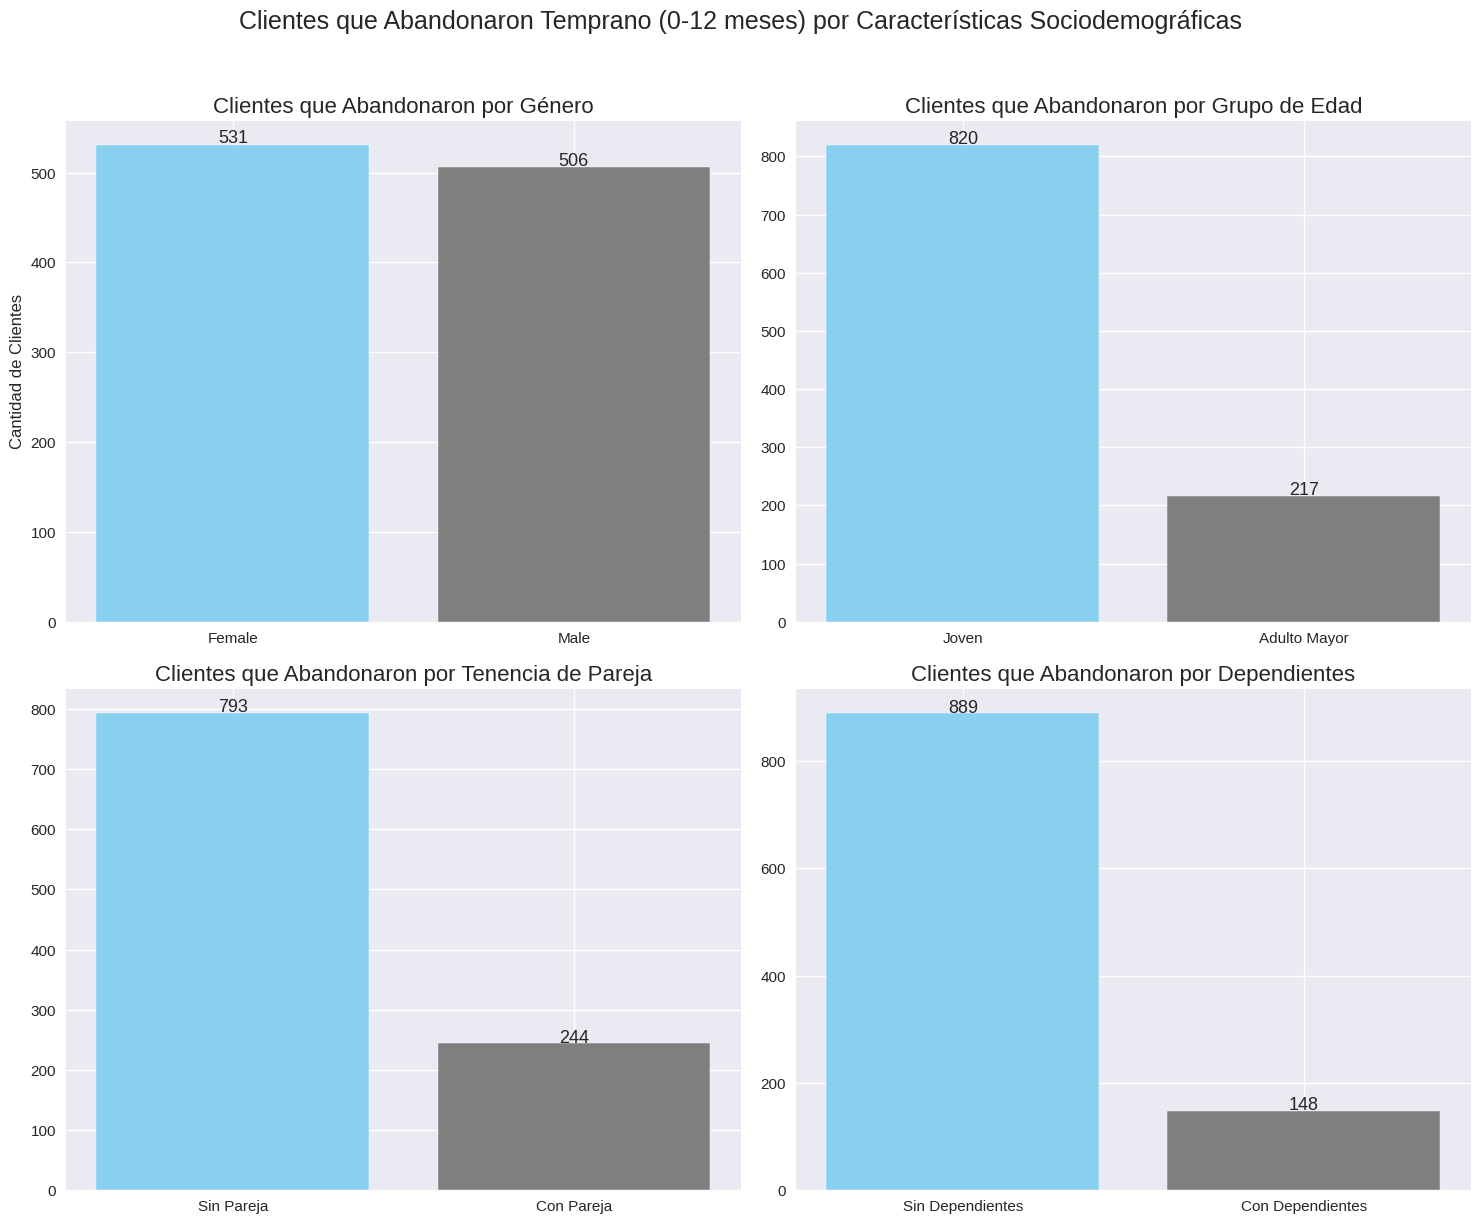

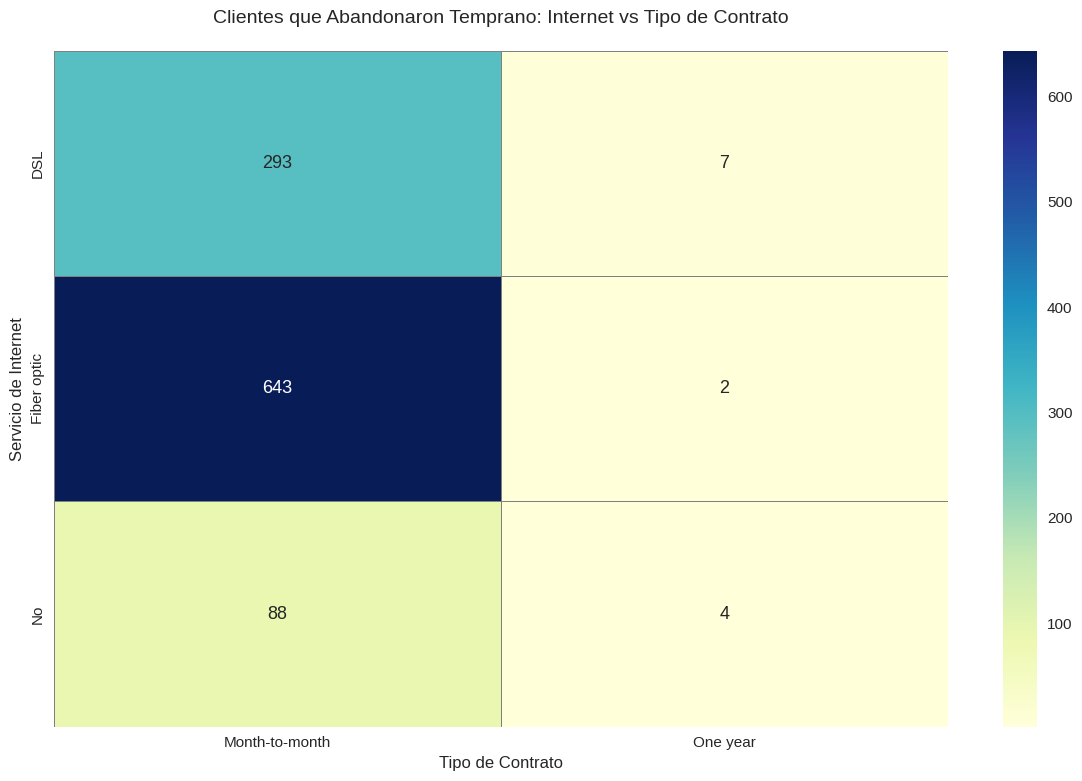

In [262]:
# Configuración
plt.rcParams.update({
    'figure.figsize': (14, 8),
    'axes.titlesize': 16,
    'axes.labelsize': 12
})
sns.set_palette("pastel")

# Cargar datos
df = pd.read_csv('TelecomX_Data_normalizado.csv')
df['Abandono_temprano'] = (df['Churn'] == 'Yes') & (df['tenure'] <= 12)

# 1. Análisis Sociodemográfico ===========================================
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Clientes que Abandonaron Temprano (0-12 meses) por Características Sociodemográficas',
             fontsize=18, y=1.02)

# Género
gender_data = df[df['Abandono_temprano']].groupby('gender').size()
axes[0, 0].bar(gender_data.index, gender_data.values, color=['#89CFF0', '#7F7F7F'])  #['#FF9999', '#66B3FF']) ['#89CFF0', '#7F7F7F']
axes[0, 0].set_title('Clientes que Abandonaron por Género')
axes[0, 0].set_ylabel('Cantidad de Clientes')
for i, v in enumerate(gender_data.values):
    axes[0, 0].text(i, v + 2, f"{v:,}", ha='center')

# Edad (agrupada)
df['AgeGroup'] = pd.cut(df['SeniorCitizen'], bins=[-1, 0, 1], labels=['Joven', 'Adulto Mayor'])
age_data = df[df['Abandono_temprano']].groupby('AgeGroup', observed=False).size()
axes[0, 1].bar(age_data.index, age_data.values, color=['#89CFF0', '#7F7F7F'])
axes[0, 1].set_title('Clientes que Abandonaron por Grupo de Edad')
for i, v in enumerate(age_data.values):
    axes[0, 1].text(i, v + 2, f"{v:,}", ha='center')

# Pareja
partner_data = df[df['Abandono_temprano']].groupby('Partner').size()
axes[1, 0].bar(partner_data.index, partner_data.values, color=['#89CFF0', '#7F7F7F'])
axes[1, 0].set_title('Clientes que Abandonaron por Tenencia de Pareja')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['Sin Pareja', 'Con Pareja'])
for i, v in enumerate(partner_data.values):
    axes[1, 0].text(i, v + 2, f"{v:,}", ha='center')

# Dependientes
dependent_data = df[df['Abandono_temprano']].groupby('Dependents').size()
axes[1, 1].bar(dependent_data.index, dependent_data.values, color=['#89CFF0', '#7F7F7F'])
axes[1, 1].set_title('Clientes que Abandonaron por Dependientes')
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['Sin Dependientes', 'Con Dependientes'])
for i, v in enumerate(dependent_data.values):
    axes[1, 1].text(i, v + 2, f"{v:,}", ha='center')

plt.tight_layout()
plt.show()


# 3. Análisis Multivariable =============================================
plt.figure(figsize=(12, 8))
cross_data = pd.pivot_table(df[df['Abandono_temprano']],
                            index='InternetService',
                            columns='Contract',
                            values='customerID',  # cualquier campo no nulo
                            aggfunc='count')

sns.heatmap(cross_data, annot=True, fmt=",.0f", cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title('Clientes que Abandonaron Temprano: Internet vs Tipo de Contrato\n', fontsize=14)
plt.xlabel('Tipo de Contrato')
plt.ylabel('Servicio de Internet')
plt.tight_layout()
plt.show()


**<font color=#56B4E9>Tasa de Abandono por Sexo y Grupo de Edad</font>**

---
---


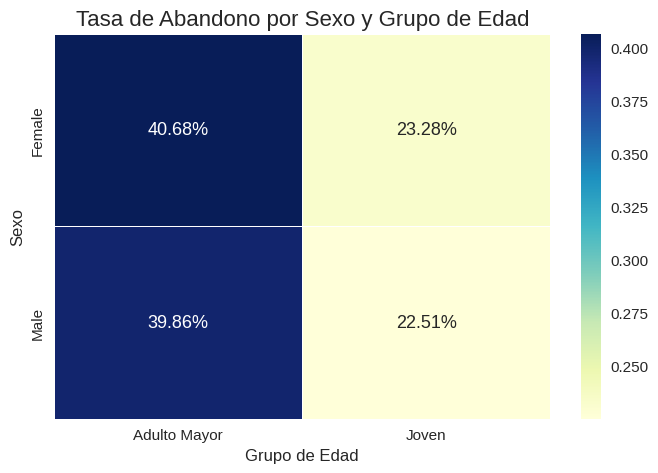

In [263]:
# Crear variable AgeGroup según SeniorCitizen (0 = Joven, 1 = Adulto Mayor)
df['AgeGroup'] = df['SeniorCitizen'].map({0: 'Joven', 1: 'Adulto Mayor'})

# Calcular tasa de abandono (Churn = 'Yes') para cada combinación de gender y AgeGroup
heatmap_data = df.groupby(['gender', 'AgeGroup'])['Churn'].apply(lambda x: (x == 'Yes').mean()).unstack()

# Graficar mapa de calor
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".2%", cmap="YlGnBu", linewidths=0.5)
plt.title('Tasa de Abandono por Sexo y Grupo de Edad')
plt.ylabel('Sexo')
plt.xlabel('Grupo de Edad')
plt.show()


**<font color=#56B4E9>Cantidad de Clientes que Abandonaron Temprano por Tipo de Servicio</font>**

---
---

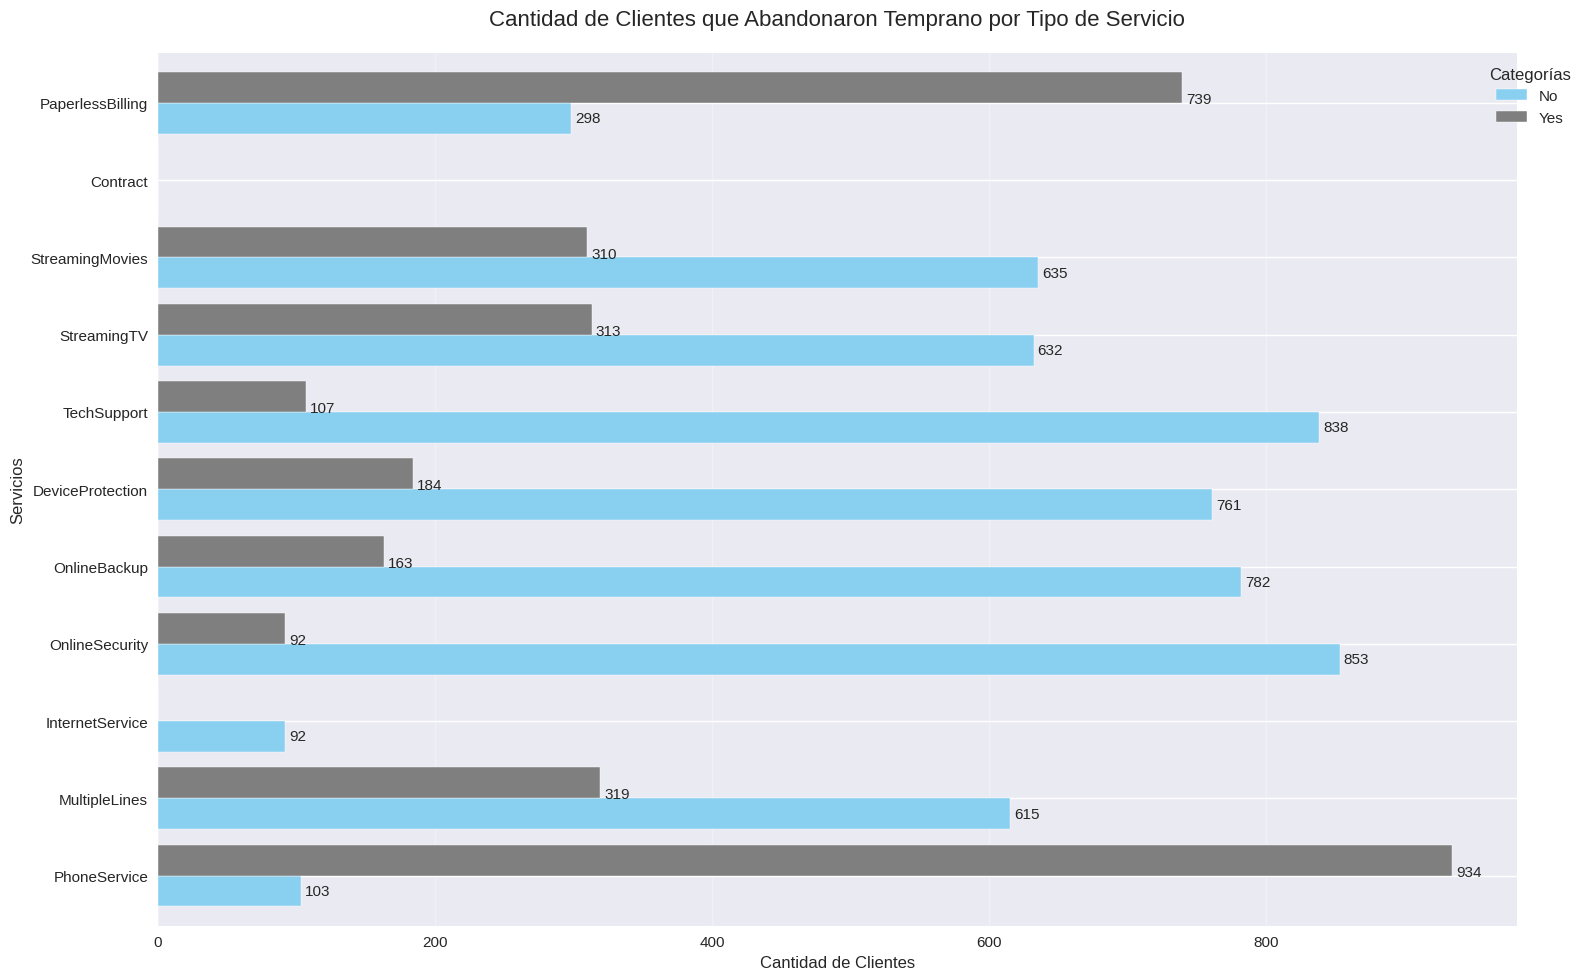

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Lista de servicios
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'Contract', 'PaperlessBilling']

# Crear DataFrame para almacenar datos
service_data = pd.DataFrame()

for service in services:
    temp = df[df['Abandono_temprano']].groupby(service).size()
    service_data[service] = temp

# Transponer para que los servicios queden como filas
service_data = service_data.fillna(0).astype(int).T

# Si hay más de dos columnas (categorías), seleccionamos solo dos
if service_data.shape[1] > 2:
    service_data = service_data[service_data.columns[:2]]

# Colores personalizados: azul claro y gris intermedio
custom_colors = ['#89CFF0', '#7F7F7F']

# Graficar
fig, ax = plt.subplots(figsize=(16, 10))
service_data.plot(kind='barh', stacked=False, width=0.8, color=custom_colors, ax=ax)

# Añadir etiquetas con las cantidades
for i, (index, row) in enumerate(service_data.iterrows()):
    for j, valor in enumerate(row):
        if valor > 0:
            ax.text(valor + 3, i - 0.2 + j * 0.25, str(valor), va='center', fontsize=11)

# Personalizar gráfico
plt.title('Cantidad de Clientes que Abandonaron Temprano por Tipo de Servicio', fontsize=16, pad=20)
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Servicios')
plt.legend(title='Categorías', bbox_to_anchor=(1.05, 1), fontsize=11, title_fontsize=12)
plt.grid(axis='x', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


**<font color=#56B4E9>Porcentaje de Clientes que Abandonaron Temprano por Tipo de Servicio</font>**

---
---

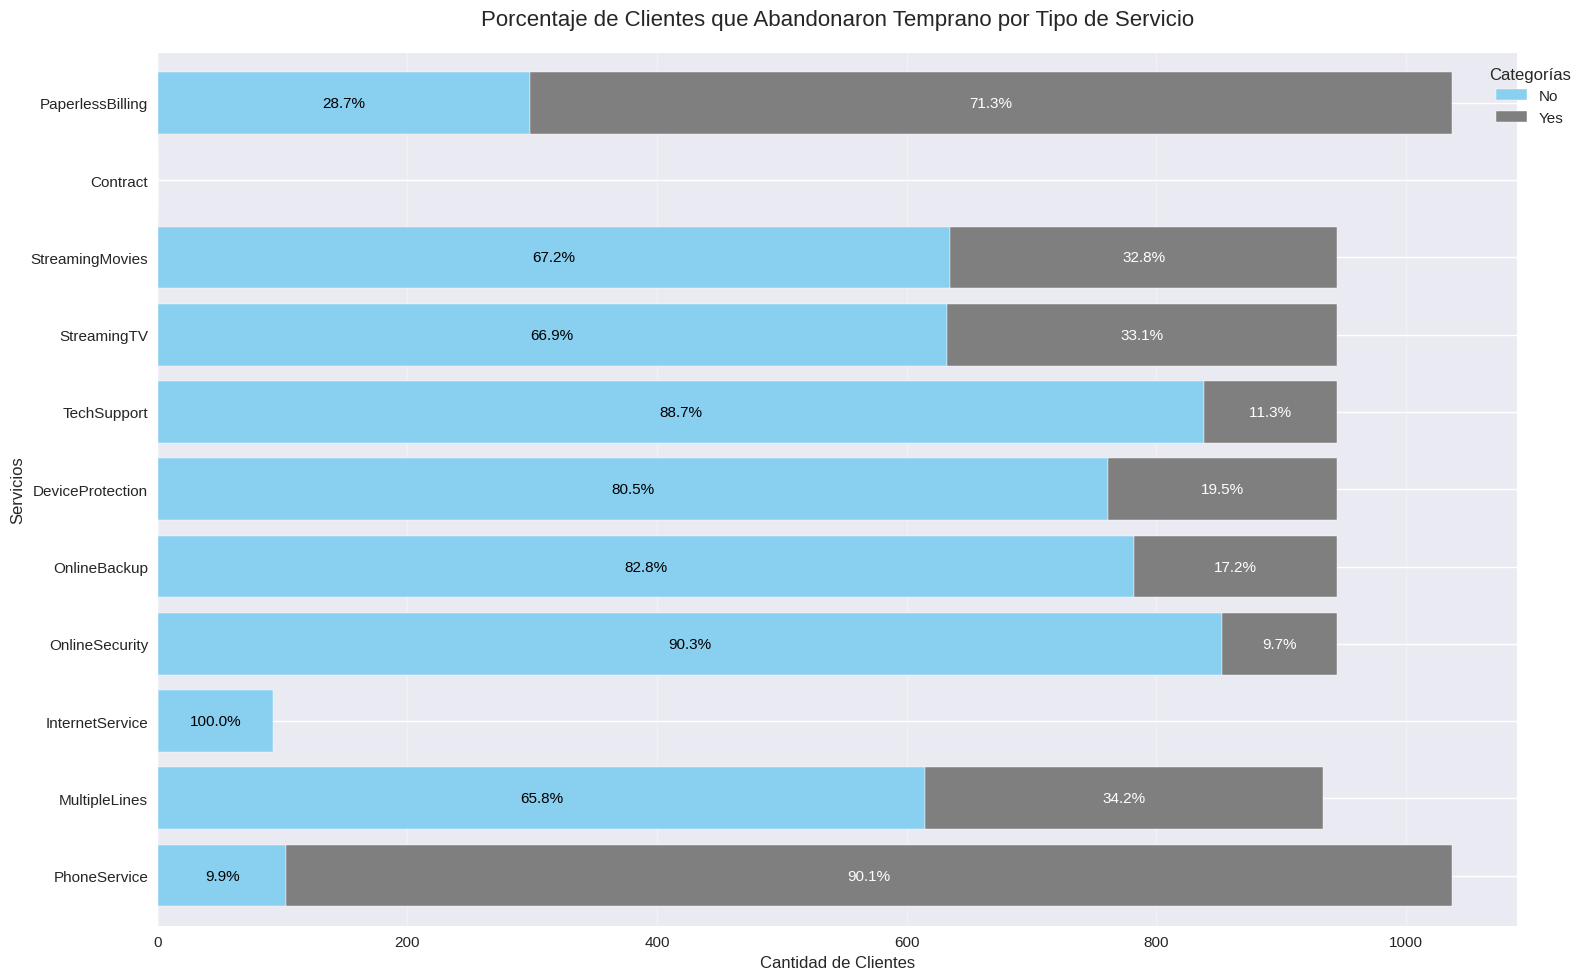

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Servicios a analizar
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'Contract', 'PaperlessBilling']

# Diccionario para almacenar conteo por categoría
service_data = pd.DataFrame()

for service in services:
    temp = df[df['Abandono_temprano']].groupby(service).size()
    service_data[service] = temp

# Limpiar y transponer
service_data = service_data.fillna(0).astype(int).T

# Si hay más de dos categorías, limitar a las 2 principales
if service_data.shape[1] > 2:
    service_data = service_data[service_data.columns[:2]]

# Colores personalizados: azul claro y gris intermedio
custom_colors = ['#89CFF0', '#7F7F7F']

# Graficar
fig, ax = plt.subplots(figsize=(16, 10))
bars = service_data.plot(kind='barh', stacked=True, width=0.8, color=custom_colors, ax=ax)

# Añadir porcentajes dentro de cada barra
for i, (index, row) in enumerate(service_data.iterrows()):
    total = row.sum()
    x_offset = 0
    for j, value in enumerate(row):
        if value > 0:
            porcentaje = value / total * 100
            ax.text(x_offset + value / 2, i,
                    f'{porcentaje:.1f}%',
                    va='center', ha='center',
                    fontsize=11, color='white' if j == 1 else 'black')  # Mejora contraste
            x_offset += value

# Estética del gráfico
plt.title('Porcentaje de Clientes que Abandonaron Temprano por Tipo de Servicio', fontsize=16, pad=20)
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Servicios')
plt.legend(title='Categorías', bbox_to_anchor=(1.05, 1), fontsize=11, title_fontsize=12)
plt.grid(axis='x', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


**<font color=#56B4E9>Distribución de Clientes por Tipo de Contrato y Estado (Abandono o Permanencia)</font>**


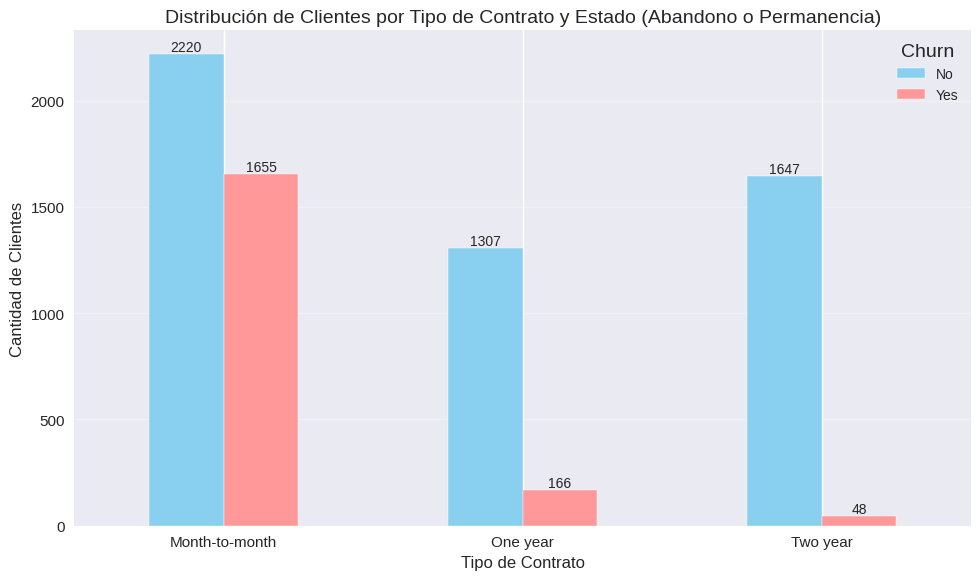

In [266]:
# Agrupación de datos: conteo de clientes por tipo de contrato y churn
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack().fillna(0)

# Colores personalizados: azul claro (No) y rojo tenue (Yes)
colors = ['#89CFF0', '#FF9999']  # No, Yes

# Gráfico de barras agrupadas
ax = contract_churn.plot(kind='bar', figsize=(10, 6), color=colors)

# Añadir etiquetas a las barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# Estética del gráfico
plt.title('Distribución de Clientes por Tipo de Contrato y Estado (Abandono o Permanencia)', fontsize=14)
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


**<font color=#56B4E9>Porcentaje de Clientes por Tipo de Contrato y Estado (Abandono o Permanencia)</font>**


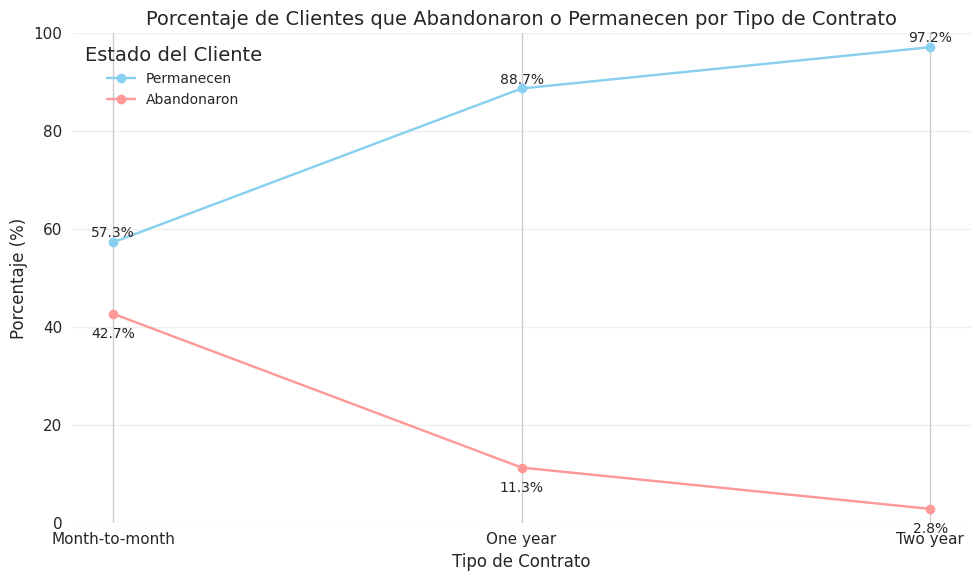

In [267]:
# Agrupar y calcular porcentaje
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack().fillna(0)

# Calcular porcentaje por tipo de contrato
contract_pct = contract_churn.div(contract_churn.sum(axis=1), axis=0) * 100

# Crear gráfico de líneas
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Graficar ambas líneas
plt.plot(contract_pct.index, contract_pct['No'], marker='o', label='Permanecen', color='#89CFF0')  # Azul claro
plt.plot(contract_pct.index, contract_pct['Yes'], marker='o', label='Abandonaron', color='#FF9999')  # Rojo claro


# Etiquetas corregidas usando .iloc[]
for i in range(len(contract_pct)):
    plt.text(i, contract_pct['No'].iloc[i] + 1,
             f"{contract_pct['No'].iloc[i]:.1f}%", ha='center', fontsize=10)

    plt.text(i, contract_pct['Yes'].iloc[i] - 5,
             f"{contract_pct['Yes'].iloc[i]:.1f}%", ha='center', fontsize=10)

# Estética
plt.title('Porcentaje de Clientes que Abandonaron o Permanecen por Tipo de Contrato', fontsize=14)
plt.ylabel('Porcentaje (%)')
plt.xlabel('Tipo de Contrato')
plt.ylim(0, 100)
plt.legend(title='Estado del Cliente')
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


**<font color=#56B4E9>Porcentaje de Abandono Temprano por Método de Pago (Clientes con Tenure ≤ 12 meses)</font>**


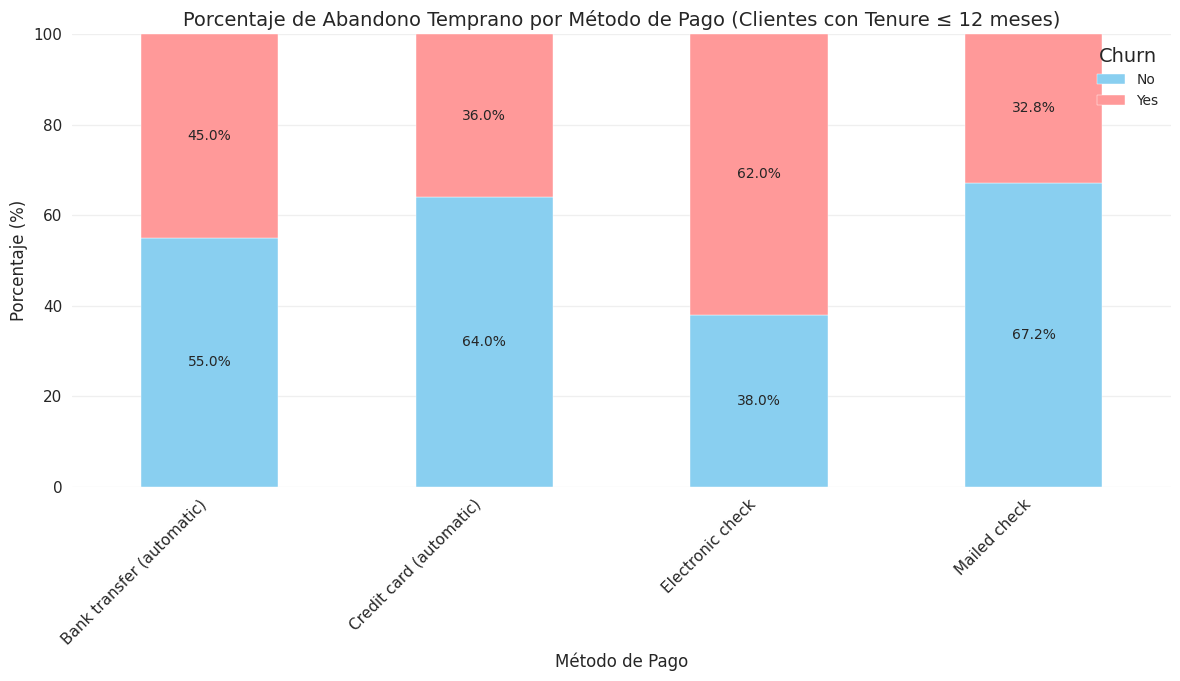

In [268]:
# Asegurarse de que la columna 'Abandono_temprano' exista
if 'Abandono_temprano' not in df.columns:
    df['Abandono_temprano'] = (df['Churn'] == 'Yes') & (df['tenure'] <= 12)

# Filtrar solo los clientes que abandonaron en los primeros 12 meses o no (dentro de ese grupo)
df_temprano = df[df['tenure'] <= 12]

# Agrupar por método de pago y estado (Churn)
payment_churn_temprano = df_temprano.groupby(['PaymentMethod', 'Churn']).size().unstack().fillna(0)

# Calcular porcentajes por método de pago
payment_pct_temprano = payment_churn_temprano.div(payment_churn_temprano.sum(axis=1), axis=0) * 100

# Colores personalizados: azul claro (No), rojo claro (Yes)
colors = ['#89CFF0', '#FF9999']

# Crear gráfico de barras apiladas
ax = payment_pct_temprano.plot(kind='bar', stacked=True, color=colors, figsize=(12, 7))

# Agregar etiquetas de porcentaje dentro de las barras
for i, (index, row) in enumerate(payment_pct_temprano.iterrows()):
    y_offset = 0
    for j, value in enumerate(row):
        if value > 0:
            ax.text(i, y_offset + value / 2, f"{value:.1f}%", ha='center', va='center', fontsize=10)
            y_offset += value

# Estética del gráfico
plt.title('Porcentaje de Abandono Temprano por Método de Pago (Clientes con Tenure ≤ 12 meses)', fontsize=14)
plt.xlabel('Método de Pago')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn', loc='upper right')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


**<font color=#56B4E9>Distribución de Total Gastado por Estado de Abandono y Distribución del Tiempo de Contrato según Estado de Abandono</font>**

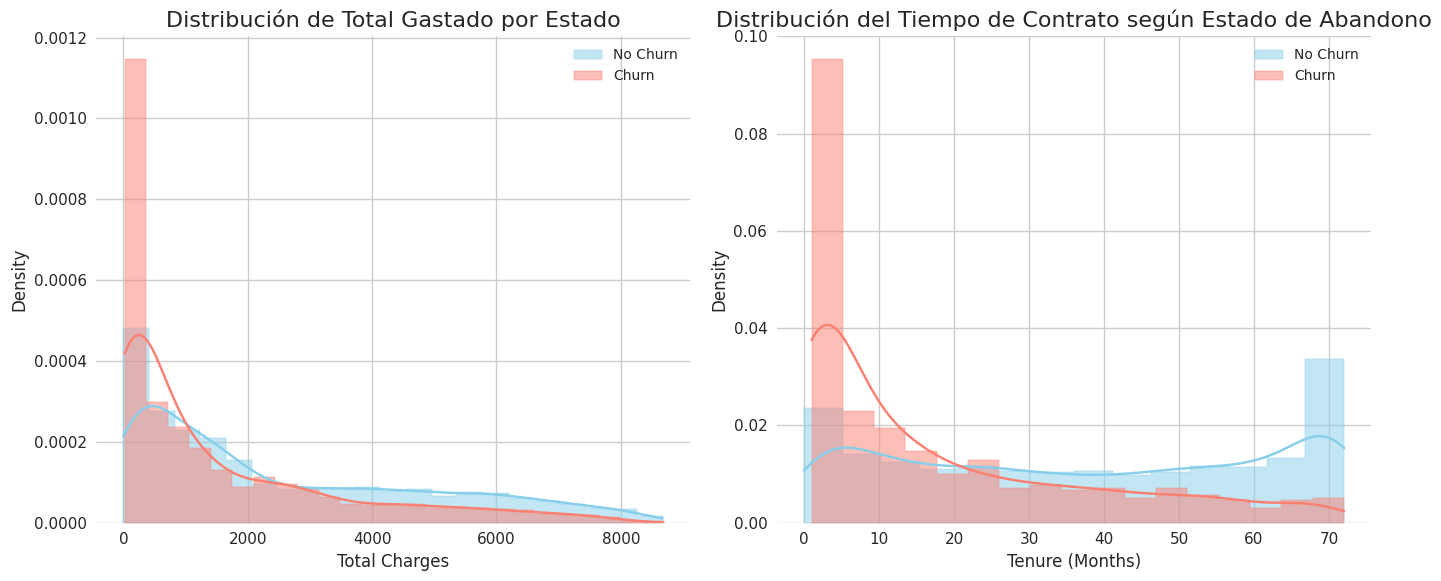

In [269]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rename columns in the DataFrame for clarity (optional)
df = df.rename(columns={'Charges.Total': 'TotalCharges', 'tenure': 'Tenure'})

# Variables with English column names
TotalCharges_no_churn = df[df['Churn'] == 'No']['TotalCharges'].dropna()
TotalCharges_churn = df[df['Churn'] == 'Yes']['TotalCharges'].dropna()
Tenure_no_churn = df[df['Churn'] == 'No']['Tenure'].dropna()
Tenure_churn = df[df['Churn'] == 'Yes']['Tenure'].dropna()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(TotalCharges_no_churn, color='skyblue', label='No Churn', kde=True, stat='density', element='step', fill=True)
sns.histplot(TotalCharges_churn, color='salmon', label='Churn', kde=True, stat='density', element='step', fill=True)
plt.title('Distribución de Total Gastado por Estado')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(Tenure_no_churn, color='skyblue', label='No Churn', kde=True, stat='density', element='step', fill=True)
sns.histplot(Tenure_churn, color='salmon', label='Churn', kde=True, stat='density', element='step', fill=True)
plt.title('Distribución del Tiempo de Contrato según Estado de Abandono')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
# Guardar el gráfico en un archivo PNG con resolución 300 dpi
plt.savefig('/content/grafico_churn.png', dpi=300)
plt.show()
plt.close()




**<font color=#56B4E9>Box Plot de Total Gastado por Estado de Cancelación y Tiempo de Contrato por Estado de Cancelación(Abandono)</font>**

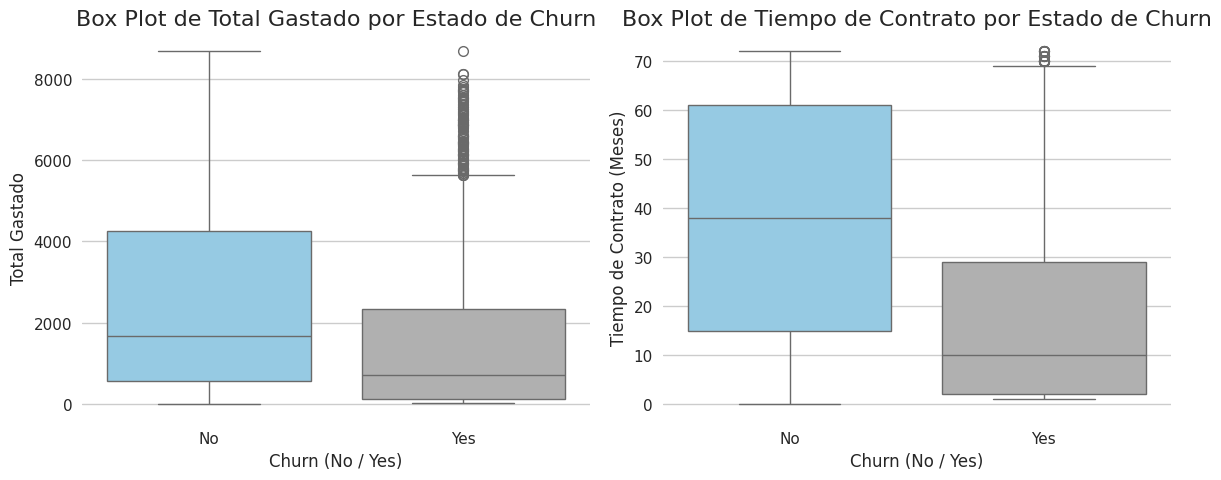

In [270]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='TotalCharges', data=df, hue='Churn',
            palette={'No': '#89CFF0', 'Yes': '#B0B0B0'}, dodge=False)
plt.title('Box Plot de Total Gastado por Estado de Churn')
plt.xlabel('Churn (No / Yes)')
plt.ylabel('Total Gastado')
plt.legend([], [], frameon=False)  # Oculta leyenda duplicada

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='Tenure', data=df, hue='Churn',
            palette={'No': '#89CFF0', 'Yes': '#B0B0B0'}, dodge=False)
plt.title('Box Plot de Tiempo de Contrato por Estado de Churn')
plt.xlabel('Churn (No / Yes)')
plt.ylabel('Tiempo de Contrato (Meses)')
plt.legend([], [], frameon=False)  # Oculta leyenda duplicada


plt.tight_layout()
# Guardar la imagen
plt.savefig('/content/boxplot_churn.png', dpi=300)
plt.show()




#📄 Informe final

## Informe de Análisis de Churn de Clientes - Telecom X

---

### 🔹 Introducción

Como asistente de análisis de datos en **Telecom X**, el objetivo principal de este estudio fue comprender a fondo el fenómeno de la **evasión de clientes**. Telecom X enfrenta una alta tasa de cancelaciones de servicios, lo que afecta negativamente sus ingresos y crecimiento sostenido. Este informe documenta el proceso analítico completo: desde la carga de datos hasta la obtención de insights clave, con el fin de fundamentar el desarrollo de modelos predictivos y estrategias de retención.

---

### 🔹 Limpieza y Tratamiento de Datos

Los datos fueron importados desde un archivo JSON que requirió ser normalizado y transformado en cinco DataFrames para su inspección individual. Posteriormente, se unificaron en un único DataFrame consolidado.

Pasos clave:

- **Normalización de valores categóricos**: Se transformaron los valores 'Yes' y 'No' a 1 y 0 para facilitar el análisis cuantitativo.
- **Reemplazo de cadenas "No {algo} service"** por ceros.
- **Conversión de la columna Charges.Total a tipo numérico**, reemplazando cadenas vacías por 0.
- **Creación de columnas derivadas**:
  - Abandono_temprano: clientes que cancelaron dentro de los primeros 12 meses.
  - Grupo_tenure: clasificación del tiempo de contrato en grupos.
  - Churn_bin: versión binaria de la columna Churn.
- **Cambio de nombres de columnas** al inglés estándar para facilitar la integración con bibliotecas de visualización.

---

### 🔹 Análisis Exploratorio de Datos (EDA)

#### Distribución general

- **Clientes que permanecieron**: 5398  
- **Clientes que abandonaron**: 1869

#### Variables categóricas y churn

- **Género**: Las mujeres presentaron un número absoluto de abandonos mayor que los hombres.
- **Edad**: Los "no seniors" tienen más abandono absoluto, pero los seniors también mostraron una tasa preocupante.
- **Contrato**:
  - Contratos **mensuales**: mayor riesgo de abandono.
  - Contratos de **dos años**: menor tasa de churn.
- **Método de pago**:
  - **Cheque electrónico**: más abandonos (1071).
  - **Tarjeta de crédito**: mayor estabilidad.

#### Variables numéricas

##### Total Gastado (TotalCharges)

- Clientes con churn: promedio **$1531.80**, mediana **$703.55**
- Clientes que permanecen: promedio **$2535.26**, mediana **$1663.63**

**🧠 Insight:** ¡Los que abandonan gastan menos!

##### Tiempo de Contrato (Tenure)

- Clientes con churn: promedio **18 meses**, mediana **10 meses**
- Clientes que permanecen: promedio **37 meses**, mediana **37 meses**

**🧠 Insight:** Mayor permanencia reduce el churn significativamente.

---

### 🔹 Visualización Gráfica de Variables Clave

Para complementar el análisis numérico, a continuación se presentan dos gráficos que ilustran la distribución y comparación entre clientes con y sin churn en las variables TotalCharges y Tenure.

#### Distribuciones de Total Gastado y Tiempo de Contrato

display(Image('/content/grafico_churn.png'))

Los histogramas muestran que los clientes que abandonan tienden a tener menores gastos totales y menor tiempo de contrato, confirmando los insights previos.

#### Boxplots de Total Gastado y Tiempo de Contrato por Estado de Churn

display(Image('/content/boxplot_churn.png'))

Los boxplots refuerzan la diferencia significativa entre los grupos, destacando la mayor dispersión en clientes que permanecen y una concentración en valores bajos para quienes abandonan.

---

### 🔹 Conclusiones e Insights

- **El tiempo de contrato y el total gastado** son indicadores claves de churn.
- **Clientes nuevos**, especialmente en contratos mensuales, tienen alta propensión al abandono.
- **El cheque electrónico** como método de pago está altamente relacionado con la cancelación.
- **Contratos largos** y pagos con tarjeta de crédito ayudan a retener clientes.

---

### 🔹 Recomendaciones

1. **Foco en clientes nuevos (0-12 meses)**  
   Campañas de bienvenida, seguimiento personalizado, promociones exclusivas.

2. **Incentivar contratos a largo plazo**  
   Bonificaciones, mejoras en servicios para quienes migran a contratos de 1 o 2 años.

3. **Abordar los usuarios de cheque electrónico**  
   Encuestas de satisfacción, incentivos para cambiar de método de pago.

4. **Segmentar clientes con bajo gasto**  
   Paquetes personalizados, mayor valor percibido.

5. **Desarrollar modelos predictivos**  
   Integrar variables clave como tenure, TotalCharges, Contract, PaymentMethod, etc.

---

Este informe proporciona las bases para tomar decisiones estratégicas basadas en datos reales, y es el primer paso hacia una gestión proactiva de la retención de clientes en Telecom X.